# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [0]:
passes = np.array([0, 0, 1, 0])
doesnt = np.array([0, 0, 0, 1])

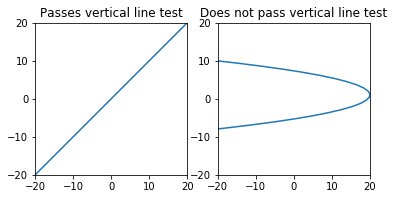

In [51]:
fig, ax = plt.subplots(1, 2)
# ax[0] = fig.gca()
fig.sharex = True
ax[0].set_xlim(-20, 20)
ax[0].set_ylim(-20, 20)
ax[0].set_aspect('equal')
ax[0].set_title('Passes vertical line test')

x_line = np.array(np.linspace(*ax[0].get_xlim()))
y_line = x_line
ax[0].plot(x_line, y_line)

# ax[1] = fig.gca()
ax[1].set_xlim(-20, 20)
ax[1].set_ylim(-20, 20)
ax[1].set_aspect('equal')
ax[1].set_title('Does not pass vertical line test')

x_line = np.array(np.linspace(*ax[0].get_xlim()))
y_line = -.5 * (x_line - 1)**2 + 20
ax[1].plot(y_line, x_line)
plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

Can only have one output per input, by definition.

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

2 is the only relation with one y per x.

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2,  x_1+x_3,  x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3,   x_2x_4)
\end{align}

I think m is three dimentions mapping to three and n is four dimentions mapping to two. I'm not so familiar with this notation though.

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

Yes. Matrix multiplication of a 2x2 matrix with at 2x3 matrix resulting in a 2x3 matrix.

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

p([1, 0]) = [1, -1] 
p([0, 1]) = [3, 2]
transformation matrix of p = [[1, -1], [3, 2]]

q([1, 0, 0]) = [4, -1, 5]
q([0, 1, 0]) = [1, 2, 1]
q([0, 0, 1]) = [2, 3, -2]

the tranformation matrix of q = [[4, -1, 5], [1, 2, 1], [2, 3, -2]]

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [0]:
pt = np.array([[1, -1], [3, 2]])
qt = np.array([[4, -1, 5], [1, 2, 1], [2, 3, -2]])

In [0]:
def p_funct(vect):
  return [vect[0] + (3 * vect[1]), (vect[1] * 2) - vect[0]]

def q_funct(vect):
  return [(vect[0] * 4) + vect[1] + (vect[2] * 2), (vect[1] * 2) - vect[0] + (vect[2] * 3), (vect[0] * 5) - (vect[2] * 2) + vect[1]]

In [0]:
test2 = np.array([2, 5])
test3 = np.array([2, 5, 7])

In [60]:
print(np.matmul(test2, pt))
print(p_funct(test2))
np.matmul(test2, pt) == p_funct(test2)

[17  8]
[17, 8]


array([ True,  True])

In [61]:
print(np.matmul(test3, qt))
print(q_funct(test3))
np.matmul(test3, qt) == q_funct(test3)

[27 29  1]
[27, 29, 1]


array([ True,  True,  True])

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

The set of lower dimensional vectors onto which a projection of data retains the maximum amount of information (variance) from that higher dimension.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

It's very difficult to have a visual or other sense of how variables relate to one another or the dependant variable.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

Five to One, yo!

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [85]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
Y = df['species']

In [86]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df[columns]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [87]:
for column in columns[:-1]:
  X[column] = X[column].map(lambda x: x - X[column].mean())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [88]:
for column in columns:
  X[column] = X[column].map(lambda x: x / X[column].std())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [89]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,0.262946
1,-1.143017,-0.124958,-1.341272,0.262946
2,-1.385353,0.337848,-1.398138,0.262946
3,-1.506521,0.106445,-1.284407,0.262946
4,-1.021849,1.263460,-1.341272,0.262946


In [90]:
X['sepal_length'].mean(), X['sepal_length'].std()

(-1.6523819349837746e-15, 1.0033500931359767)

In [91]:
x = X.values
x[:5,]

array([[-0.90068117,  1.03205722, -1.3412724 ,  0.26294594],
       [-1.14301691, -0.1249576 , -1.3412724 ,  0.26294594],
       [-1.38535265,  0.33784833, -1.39813811,  0.26294594],
       [-1.50652052,  0.10644536, -1.2844067 ,  0.26294594],
       [-1.02184904,  1.26346019, -1.3412724 ,  0.26294594]])

In [92]:
var_covar = np.matmul(x.T, x)
var_covar

array([[150.        , -16.40538749, 130.7631236 , 122.69304501],
       [-16.40538749, 150.        , -63.07741446, -53.48161344],
       [130.7631236 , -63.07741446, 150.        , 144.41356456],
       [122.69304501, -53.48161344, 144.41356456, 522.529838  ]])

In [95]:
eigvals, eigvects = np.linalg.eig(var_covar)
eigvals
eigvects

(array([637.66818035,  10.36402978, 188.63086933, 135.86675854]),
 array([[ 0.31900707, -0.63231313,  0.50103417,  0.49737244],
        [-0.15205311,  0.24587924, -0.43792445,  0.85126108],
        [ 0.36079602,  0.734053  ,  0.55813801,  0.13955066],
        [ 0.8630994 , -0.02982778, -0.49564997, -0.09219999]]))

sepal_length is the primary component followed by petal_width. Columns 0 and 2.

In [98]:
Project our data to the eigenvectors.
P = eigvects.T.dot(x.T)
P.T[:5,]

array([[-0.70122844, -0.16913415, -1.7821794 ,  0.21915709],
       [-0.60260755, -0.300388  , -1.3969128 , -0.88629572],
       [-0.77080236, -0.075104  , -1.75274424, -0.62079381],
       [-0.73323639,  0.02809973, -1.64863864, -0.86217241],
       [-0.77506738, -0.03562093, -1.94422566,  0.35587587]])

In [118]:
P.T[:,2:3]

array([[-1.7821794 ],
       [-1.3969128 ],
       [-1.75274424],
       [-1.64863864],
       [-1.94422566],
       [-2.04051215],
       [-2.04955317],
       [-1.70981271],
       [-1.59912201],
       [-1.40134634],
       [-1.77098679],
       [-1.79949229],
       [-1.39245747],
       [-1.79122043],
       [-1.92737759],
       [-2.42854732],
       [-2.16746779],
       [-1.84734397],
       [-1.69188282],
       [-2.11961611],
       [-1.40349792],
       [-2.08344367],
       [-2.31401828],
       [-1.67978235],
       [-1.70427556],
       [-1.27272574],
       [-1.80840295],
       [-1.68973124],
       [-1.62013314],
       [-1.6575275 ],
       [-1.49548124],
       [-1.59730489],
       [-2.23258877],
       [-2.24870154],
       [-1.40134634],
       [-1.60235541],
       [-1.57108133],
       [-1.40134634],
       [-1.73219793],
       [-1.64910347],
       [-1.93979213],
       [-1.02729415],
       [-1.93487197],
       [-2.04006911],
       [-2.05782504],
       [-1

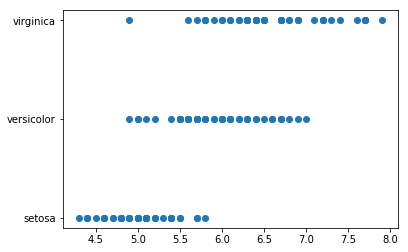

In [102]:
plt.scatter(df['sepal_length'], df['species'])

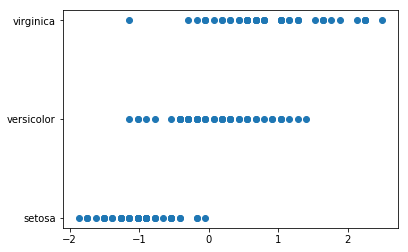

In [103]:
plt.scatter(x[:,:1], Y)

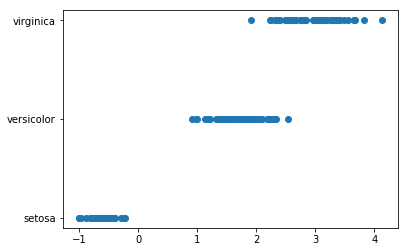

In [104]:
plt.scatter(P.T[:,:1], Y)

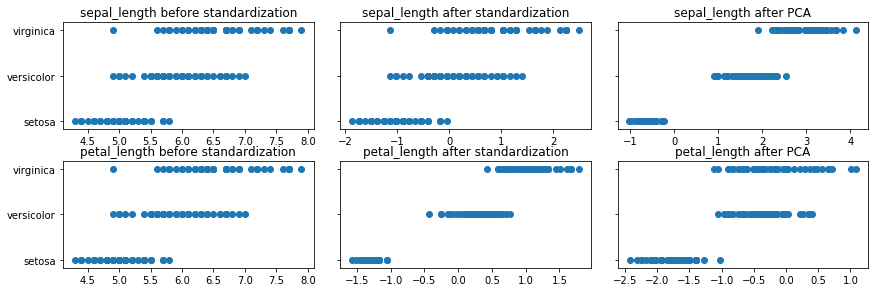

In [123]:
fig, ax = plt.subplots(2, 3, figsize=(12, 4), sharey=True)
fig.tight_layout()
ax[0][0].scatter(df['sepal_length'], df['species'])
ax[0][0].set_title('sepal_length before standardization')
ax[0][1].scatter(x[:,:1], Y)
ax[0][1].set_title('sepal_length after standardization')
ax[0][2].scatter(P.T[:,:1], Y)
ax[0][2].set_title('sepal_length after PCA')
ax[1][0].scatter(df['sepal_length'], df['species'])
ax[1][0].set_title('petal_length before standardization')
ax[1][1].scatter(x[:,2:3], Y)
ax[1][1].set_title('petal_length after standardization')
ax[1][2].scatter(P.T[:,2:3], Y)
ax[1][2].set_title('petal_length after PCA');

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)